# King County Homes

#### Import necessary tools to read and interpret data 

In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
pwd

'/Users/em/Desktop/Project_2/bsc-phase-two-project/notebooks/exploratory/Project_2.ipynb'

In [4]:
path = '../../../data/kc_house_data.csv'
df = pd.read_csv(path)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [7]:
df['date'].sort_values()

12076    1/10/2015
19359    1/12/2015
2548     1/12/2015
18398    1/12/2015
11086    1/12/2015
           ...    
19256     9/9/2014
66        9/9/2014
20288     9/9/2014
12438     9/9/2014
15702     9/9/2014
Name: date, Length: 21597, dtype: object

In [6]:
df = df.replace(np.nan,0)

In [7]:
df = df.drop(15856) #dropped the house with 33 bedrooms as it was an outlier 

## Overall correlation of the dataset

In [8]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016763,0.002328,0.005145,-0.012258,-0.131920,0.018576,-0.003602,0.011762,-0.023721,0.008169,-0.010831,0.021589,-0.010619,-0.008195,-0.001766,0.020643,-0.002734,-0.138570
price,-0.016763,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.393502,0.036031,0.667964,0.605392,0.053965,0.117858,-0.053409,0.306687,0.022047,0.585267,0.082849
bedrooms,0.002328,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.080741,0.023440,0.366174,0.492543,0.160736,0.018626,-0.158588,-0.011595,0.136561,0.404532,0.031892
bathrooms,0.005145,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,0.186011,-0.126443,0.665834,0.686664,0.507166,0.047173,-0.204778,0.024301,0.224889,0.569878,0.088297
sqft_living,-0.012258,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,0.281710,-0.059397,0.762776,0.876448,0.318140,0.051056,-0.199793,0.052178,0.241200,0.756400,0.184337
sqft_lot,-0.131920,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,0.075052,-0.008806,0.114726,0.184134,0.052939,0.004977,-0.129582,-0.085507,0.230222,0.144756,0.718203
floors,0.018576,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,0.028401,-0.264013,0.458783,0.523970,0.489175,0.003785,-0.059522,0.049280,0.125912,0.280072,-0.010734
waterfront,-0.003602,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.380543,0.016659,0.082817,0.071776,-0.024491,0.073938,0.028925,-0.012154,-0.037632,0.083822,0.030657
view,0.011762,0.393502,0.080741,0.186011,0.281710,0.075052,0.028401,0.380543,1.000000,0.045663,0.249077,0.166007,-0.054464,0.090337,0.085066,0.006334,-0.077715,0.278921,0.073079
condition,-0.023721,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,0.045663,1.000000,-0.146854,-0.158826,-0.361555,-0.055795,0.002835,-0.015209,-0.105800,-0.092979,-0.003093


## What is the average home buyer looking for when they are house hunting??
- location
- number of bathrooms
- number of bedrooms
- grade
- square feet of living space

In [90]:
df.value_counts('sqft_living')

sqft_living
1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
2656      1
2655      1
2653      1
2643      1
370       1
Length: 1034, dtype: int64

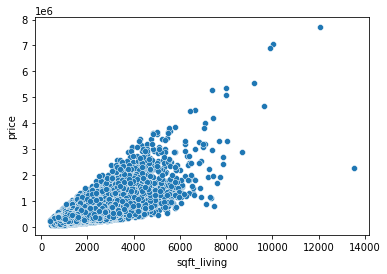

In [92]:
sns.scatterplot(data=df, x="sqft_living", y="price");

### Breakdown the IQR for the housing data 
Though we decided to not to take this route for investigating the data, this still provided a good insight to the majority of the data and their interactions

In [11]:
# df1 = df.loc[df['price'] < 645000]
# df2 = df1.loc[df1['price'] > 322000]
# middle_data = df2
# middle_data

In [12]:
#middle_data.loc[middle_data['sqft_basement'] == '?']

## Simple models of the overall correlation of the data

The models below show an overview of what we believed were some good predictors of the sale price simply based on the correltion datafram above

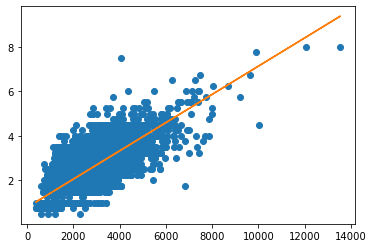

In [13]:
X = df['sqft_living']
y = df['bathrooms']

plt.plot(X, y, 'o')
m, b = np.polyfit(X, y, 1)

plt.plot(X, m*X + b);

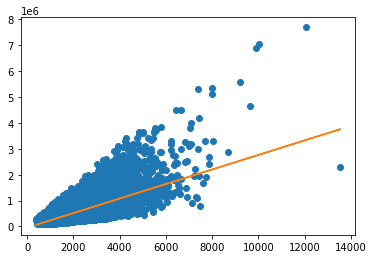

In [14]:
X = df['sqft_living']
y = df['price']

plt.plot(X, y, 'o')
m, b = np.polyfit(X, y, 1)

plt.plot(X, m*X + b);

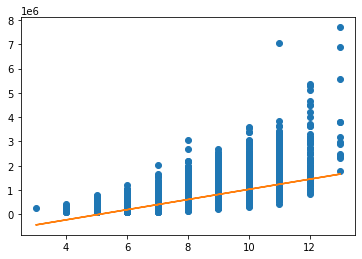

In [15]:
X = df['grade']
y = df['price']

plt.plot(X, y, 'o')
m, b = np.polyfit(X, y, 1)

plt.plot(X, m*X + b);

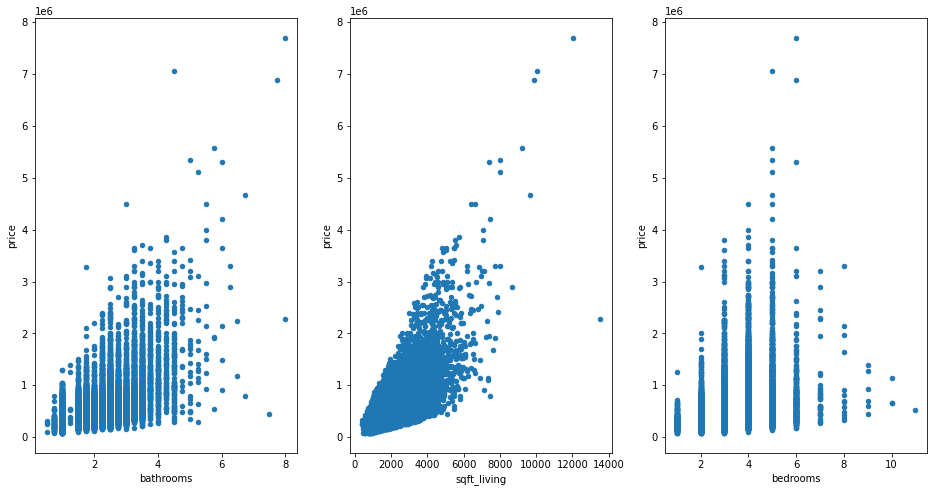

In [16]:
fig, axs = plt.subplots(1, 3,)
df.plot(kind='scatter', x='bathrooms', y='price', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='sqft_living', y='price', ax=axs[1])
df.plot(kind='scatter', x='bedrooms', y='price', ax=axs[2]);

In [17]:
#f = 'price ~ bathrooms + sqft_living + bedrooms'
#model = ols(formula=f, data=df).fit()
#model.summary()

In [18]:
#sklearn

#X = df[features]
#y = df['price']

#mlr = LinearRegression() #instantiate 
#mlr.fit(X, y) #fit 

#print(mlr.coef_)
#print(mlr.score(X,y))
# adjusted R-squared
#print(1 - ( 1 - mlr.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))

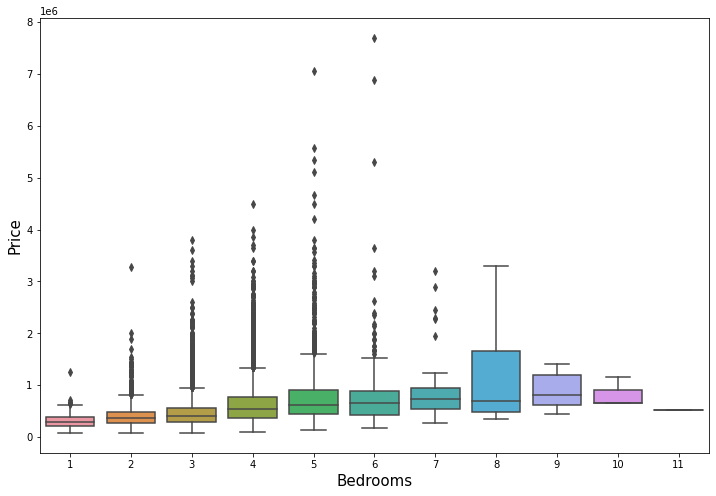

In [19]:
# Boxplot showing relationship between price and bathrooms
plt.figure(figsize=(12,8))
sns.boxplot(x=df['bedrooms'], y=df['price'])
plt.xlabel('Bedrooms', fontsize=15)
plt.ylabel('Price', fontsize=15);

In [20]:
#plt.figure(figsize=(12,8))
# sns.boxplot(x=df[''], y=df['price'])
# plt.xlabel('Sq Ft', fontsize=15)
# plt.ylabel('Price', fontsize=15);

In [21]:
# df['yr_built'].hist();

In [22]:
oldest_homes = df.loc[(df['yr_built'] < 1950)]

In [23]:
middle_homes = df.loc[(df['yr_built'] > 1950) & (df['yr_built'] < 1980)]

In [24]:
newest_homes = df.loc[(df['yr_built'] > 1980) & (df['yr_built'] < 2015)]

In [25]:
#plt.figure(figsize=(12,8))
# sns.boxplot(x=oldest_homes['yr_built'], y=oldest_homes['price'])
# plt.xlabel('Sq Ft', fontsize=15)
# plt.ylabel('Price', fontsize=15);

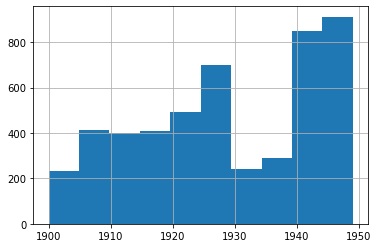

In [26]:
oldest_homes['yr_built'].hist();

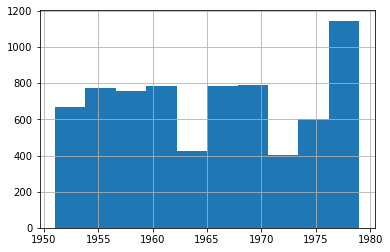

In [27]:
middle_homes['yr_built'].hist();

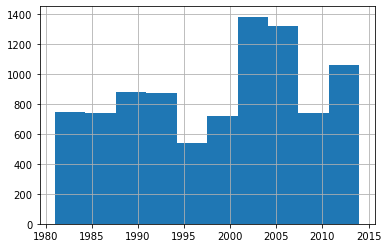

In [28]:
newest_homes['yr_built'].hist();

# Year Built

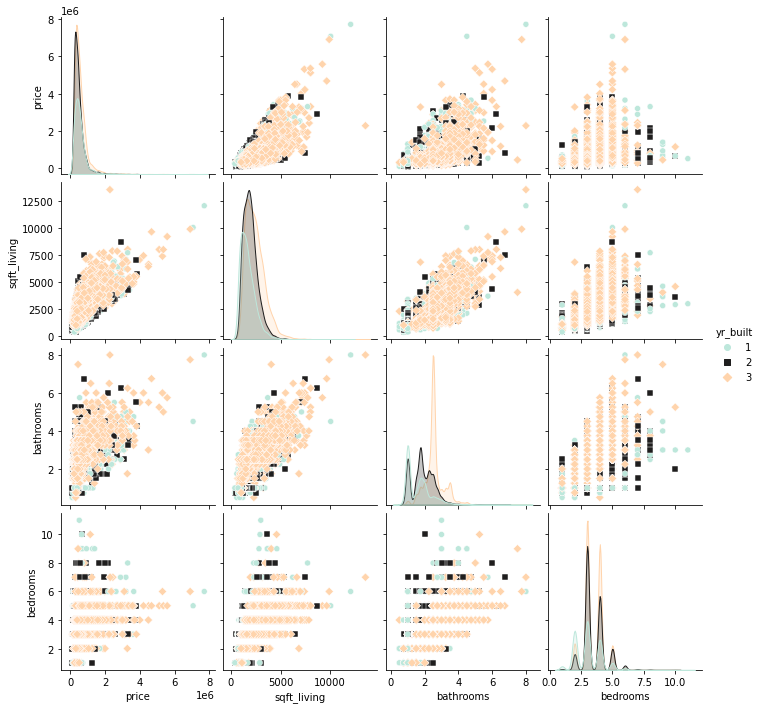

In [29]:
plotting_frame = df[["price", "sqft_living",'bathrooms', 'bedrooms', 'yr_built']]

def bin_yr(x):
    if x <= 1950:
        return 1
    elif x <= 1980:
        return 2
    else:
        return 3
    
plotting_frame = plotting_frame.assign(yr_built = plotting_frame.yr_built.apply(bin_yr))

sns.pairplot(
    plotting_frame,
    hue="yr_built",
    markers=["o", "s", "D"],
    palette = 'icefire'
);

# Square Feet

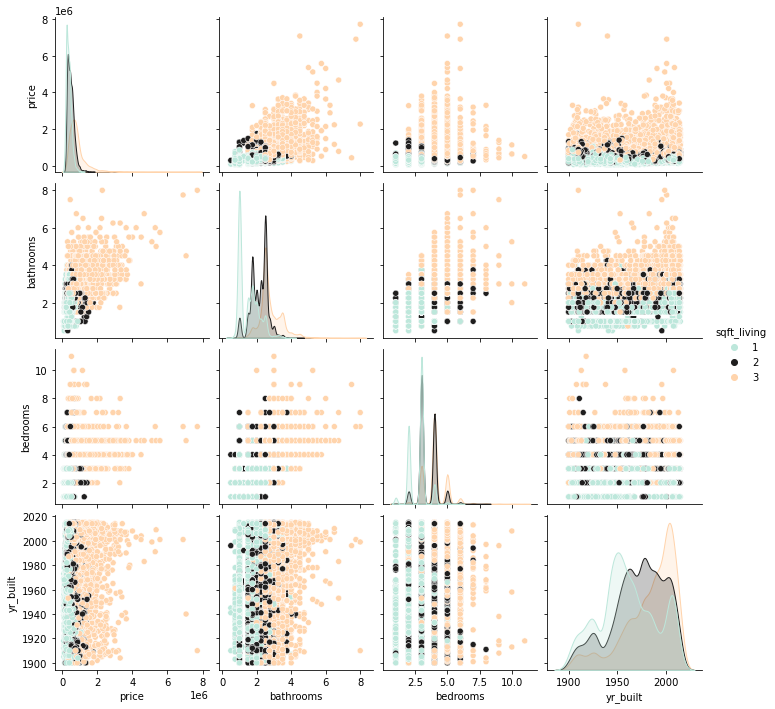

In [30]:
plotting_frame = df[["price", "sqft_living",'bathrooms', 'bedrooms', 'yr_built']]

def sqft_live(x):
    if x <= 1600:
        return 1
    elif x <= 2400:
        return 2
    else:
        return 3
    
plotting_frame = plotting_frame.assign(sqft_living = plotting_frame.sqft_living.apply(sqft_live))

sns.pairplot(
    plotting_frame,
    hue="sqft_living",
    palette = 'icefire'
);

In [31]:
small = df.loc[(df['sqft_living'] < 1600)]

In [32]:
med = df.loc[(df['sqft_living'] > 1600) & (df['sqft_living'] < 2400)]

In [33]:
large = df.loc[(df['sqft_living'] > 2400)]

In [34]:
# plotting_frame = df[["price", "sqft_living",'bathrooms', 'bedrooms', 'yr_built']]

# def bathroom(x):
#     if x <= 1600:
#         return 1
#     elif x <= 2400:
#         return 2
#     else:
#         return 3
    
# plotting_frame = plotting_frame.assign(bathrooms = plotting_frame.bathrooms.apply(bathroom))

# sns.pairplot(
#     plotting_frame,
#     hue="bathroooms",
#     palette = 'icefire'
# );

In [35]:
#df.loc[(df['bathrooms'] < 1.5)]

In [36]:
#df.loc[(df['bathrooms'] > 1.5) & (df['bathrooms'] < 2.5)]

In [37]:
#df.loc[(df['bathrooms'] > 2.5) & (df['bathrooms'] < 3.5)]

In [38]:
#df.loc[(df['bathrooms'] > 3.5)]

# Bathrooms

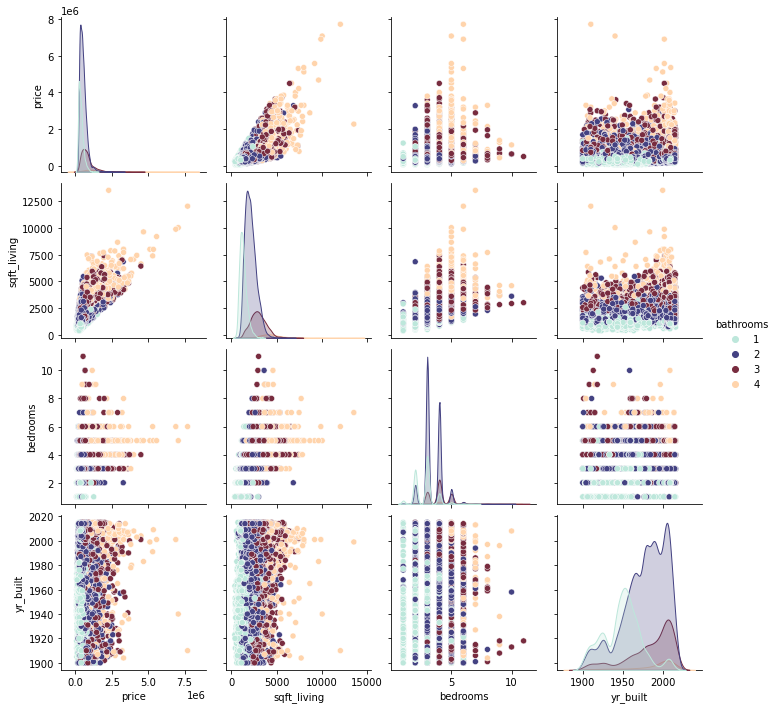

In [39]:
sns.color_palette("tab10")
plotting_frame = df[["price", "sqft_living",'bathrooms', 'bedrooms', 'yr_built']]

def bathroom(x):
    if x <= 1.5:
        return 1
    elif x <= 2.5:
        return 2
    elif x<= 3.5:
        return 3
    else:
        return 4
    
plotting_frame = plotting_frame.assign(bathrooms = plotting_frame.bathrooms.apply(bathroom))

sns.pairplot(
    plotting_frame,
    hue="bathrooms",
    palette = 'icefire'
);

- Notes: Pete has the working function
- we have broken the price into 10 bins

## Interactions 
Model interactions and see the most influential relationships for the overall model (on Pete's computer)

In [41]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
regression = LinearRegression()

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [73]:
ohe = OneHotEncoder(sparse=False)

In [84]:
continuous = ['price', 'sqft_living', 'grade', 'bedrooms','bathrooms']
categoricals = ['zipcode', 'waterfront', 'view']

df_cont = df[continuous]

# log features
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

# one hot encode categoricals
ohe.fit(df[categoricals])

train_encoded = ohe.transform(df[categoricals])

df_ohe = pd.DataFrame(train_encoded, columns=ohe.get_feature_names(), index=df[categoricals].index)

In [85]:
preprocessed = pd.concat([df_cont, df_ohe], axis=1)
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

In [86]:
X

,sqft_living,grade,bedrooms,bathrooms,x0_98001,x0_98002,x0_98003,x0_98004,x0_98005,x0_98006,...,x0_98188,x0_98198,x0_98199,x1_0.0,x1_1.0,x2_0.0,x2_1.0,x2_2.0,x2_3.0,x2_4.0
0,1180,7,3,1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2570,7,3,2.25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,770,6,2,1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1960,7,4,3.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1680,8,3,2.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,8,3,2.50,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21593,2310,8,4,2.50,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21594,1020,7,2,0.75,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21595,1600,8,3,2.50,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [87]:
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline

0.796412331110065

In [89]:
from itertools import combinations

interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
Top 3 interactions: [('sqft_living', 'grade', 0.832), ('grade', 'bathrooms', 0.824), ('sqft_living', 'bathrooms', 0.819)]
